 ## Waste Management Using CNN 

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [12]:
train_path = "DATASET/DATASET/TRAIN"
test_path = "DATASET/DATASET/TEST"

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [21]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image' : x_data, 'label' : y_data})

100%|██████████| 9999/9999 [02:09<00:00, 77.51it/s] 


In [22]:
data['image']

0        [[[255, 255, 255], [255, 255, 255], [255, 255,...
1        [[[241, 242, 247], [241, 242, 247], [241, 242,...
2        [[[224, 224, 224], [229, 229, 229], [236, 236,...
3        [[[255, 255, 255], [255, 255, 255], [255, 255,...
4        [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
                               ...                        
22559    [[[212, 204, 202], [212, 204, 202], [212, 204,...
22560    [[[205, 204, 202], [205, 204, 202], [205, 204,...
22561    [[[136, 136, 144], [136, 136, 144], [137, 137,...
22562    [[[255, 255, 255], [255, 255, 255], [255, 255,...
22563    [[[242, 240, 241], [242, 240, 241], [242, 240,...
Name: image, Length: 22564, dtype: object

In [23]:
data['label']

0        TRAIN\O
1        TRAIN\O
2        TRAIN\O
3        TRAIN\O
4        TRAIN\O
          ...   
22559    TRAIN\R
22560    TRAIN\R
22561    TRAIN\R
22562    TRAIN\R
22563    TRAIN\R
Name: label, Length: 22564, dtype: object

In [ ]:
data.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",TRAIN\O
1,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",TRAIN\O
2,"[[[224, 224, 224], [229, 229, 229], [236, 236,...",TRAIN\O
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",TRAIN\O
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",TRAIN\O


In [15]:
data.shape

(22564, 2)

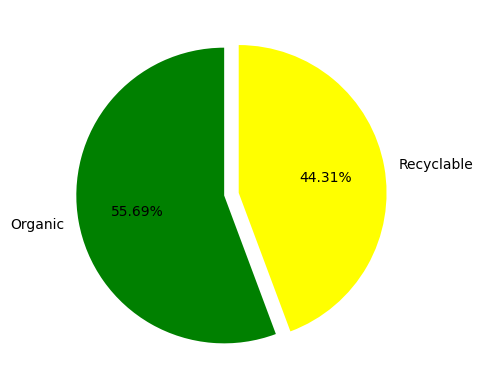

In [19]:
colors = ['green','Yellow']
plt.pie(data.label.value_counts(),labels = ['Organic','Recyclable'],autopct = '%0.2f%%',colors = colors,startangle=90,explode=[0.05,0.05])
plt.show()